In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import normalize
import math
import matplotlib.pyplot as plt
# np.random.seed(42)

In [2]:
def genitems(dataset_num, feature_num, mu, sigma):
        A = np.random.normal(mu, sigma, (dataset_num, feature_num-1))    # A: (L, d-1)
        result = np.hstack((normalize(A, axis=1) / np.sqrt(2), np.ones((dataset_num, 1)) / np.sqrt(2)))   # result: (L, d)
        return result

def means_to_click(mean):
    Y = []
    for mean_val in mean:
        X_binary = np.where(mean_val>0.5, 1,0)
        Y.append(X_binary)         
    return np.array(Y)

In [3]:
user_num = 10
article_num = 15
user_feature_num = 5
article_feature_num = 5
x_feature_num = user_feature_num + article_feature_num

T = 100
p = []
delta = 0.05
alpha = 1+np.sqrt(np.log(1/delta))
regret = []

users = genitems(user_num, user_feature_num, 0, 1)
articles = genitems(article_num, article_feature_num, 0, 1)
# x = np.concatenate((users, articles), axis=1)
true_theta = genitems(1, x_feature_num, 0, 1)[0]
# means = np.dot(x, true_theta)
print(true_theta.shape)
print('users0:', users[0])
print('users1:', users[1])

for i in range(article_num):
    print(f'article{i}: {articles[i]}')


# print(np.concatenate((users[0], articles[0])))

print('true theta: ', true_theta)

(10,)
users0: [-0.19109002  0.02828202  0.47755835  0.48437873  0.70710678]
users1: [ 0.08882206 -0.26677604 -0.64708144 -0.04718888  0.70710678]
article0: [-0.11141803 -0.05618562 -0.48624176 -0.49799413  0.70710678]
article1: [ 0.29153345  0.37017102 -0.42751128  0.30857053  0.70710678]
article2: [ 0.43331434 -0.43132755  0.32944476 -0.1328961   0.70710678]
article3: [-0.45013866  0.28135966  0.27661449 -0.37642576  0.70710678]
article4: [ 0.33301533  0.0145342   0.52759573 -0.33246398  0.70710678]
article5: [-0.22381016 -0.27624903 -0.20809405 -0.57471067  0.70710678]
article6: [ 0.0509624   0.23011565  0.51640412 -0.4216354   0.70710678]
article7: [-0.02341235  0.31697573  0.03584096 -0.63062958  0.70710678]
article8: [ 0.56887583 -0.36344157 -0.17874794 -0.11108415  0.70710678]
article9: [ 0.04455236  0.51693881 -0.46447791  0.12267694  0.70710678]
article10: [-0.53740257  0.31120453 -0.24977691  0.22795111  0.70710678]
article11: [ 0.20535368  0.48108418  0.30183315 -0.36781059  

In [4]:

true_idx_list = []
for idx, user in enumerate(users):
    true_list = []
    for idx, article in enumerate(articles):
        x = np.concatenate((user, article))
        true_list.append(np.matmul(x, true_theta))
    # print(true_list)
    true_idx = np.argmax(true_list)
    # print(true_idx)
    true_idx_list.append(true_idx)
    
    
true_idx_list = np.array(true_idx_list)
print(true_idx_list)
print(true_idx_list.shape)
    
    

[2 2 2 2 2 2 2 2 2 2]
(10,)


In [5]:

for t in range(T):
    if t == 0:
        A = np.identity(x_feature_num)
        b = np.zeros(x_feature_num)
    
    idx_user = np.random.randint(len(users))
    user = users[idx_user]
    print(f'user: {user}')
    
    for idx, article in enumerate(articles):
        x = np.concatenate((user, article))
        # x = x.reshape(len(x))
        # print(idx, article)
        
        theta_hat = np.matmul(np.linalg.inv(A), b)
        p.append(np.matmul(theta_hat.T, x) + alpha * math.sqrt(np.matmul(np.matmul(x.T, np.linalg.inv(A)), x)))
    
    print(f'theta hat T shape = {theta_hat.T.shape}')
    
    argmax_a = np.argmax(p)
    print(f'p = {len(p)}')
    print(f'p[0] = {p[0]}')
    print(f'{argmax_a}')
    chosen_a = articles[argmax_a]
    print(f'chosen_a: {chosen_a}')
    chosen_x = np.concatenate((user,chosen_a))
    # print(x)
    # Observe a real-valued payoff r_t
    chosen_mean = np.matmul(chosen_x, true_theta)
    print(f'chosen_mean: {chosen_mean}')
    if chosen_mean > 0.5:
        chosen_r = 1
    else:
        chosen_r = 0
    
    # print(chosen_r)
    A = A + np.matmul(chosen_x, chosen_x.T)
    print(f'A shape = {A.shape}')
    
    b = b + chosen_r * chosen_x
    print(f'b shape = {b.shape}')
    
    p = []
    true_mean = np.matmul(np.concatenate((user, articles[true_idx_list[idx_user]])), true_theta)
    regret.append(true_mean-chosen_mean)
    print('\n')

user: [-0.45663043  0.00104439  0.537813    0.04737875  0.70710678]
theta hat T shape = (10,)
p = 15
p[0] = 3.861960393053911
0
chosen_a: [-0.11141803 -0.05618562 -0.48624176 -0.49799413  0.70710678]
chosen_mean: 0.5853757856404603
A shape = (10, 10)
b shape = (10,)


user: [-0.38121661 -0.26837543 -0.05185449 -0.52911212  0.70710678]
theta hat T shape = (10,)
p = 15
p[0] = 5.4317646869394896
0
chosen_a: [-0.11141803 -0.05618562 -0.48624176 -0.49799413  0.70710678]
chosen_mean: 0.7505456674122079
A shape = (10, 10)
b shape = (10,)


user: [-0.19109002  0.02828202  0.47755835  0.48437873  0.70710678]
theta hat T shape = (10,)
p = 15
p[0] = 6.965271699204235
0
chosen_a: [-0.11141803 -0.05618562 -0.48624176 -0.49799413  0.70710678]
chosen_mean: 0.47079682969501185
A shape = (10, 10)
b shape = (10,)


user: [-0.19332992 -0.15007318  0.40145559 -0.52814296  0.70710678]
theta hat T shape = (10,)
p = 15
p[0] = 7.497703248023511
0
chosen_a: [-0.11141803 -0.05618562 -0.48624176 -0.49799413  0.7

In [6]:
print(regret)
cumulative_regret = np.cumsum(regret)
print(cumulative_regret.shape)



[0.20968311288882113, 0.20968311288882113, 0.2096831128888212, 0.20968311288882124, 0.20968311288882124, 0.2096831128888212, 0.20968311288882102, 0.20968311288882113, 0.20968311288882113, 0.20968311288882108, 0.20968311288882113, 0.20968311288882113, 0.2096831128888212, 0.20968311288882102, 0.2096831128888212, 0.20968311288882113, 0.20968311288882113, 0.20968311288882113, 0.20968311288882102, 0.20968311288882124, 0.20968311288882113, 0.20968311288882113, 0.20968311288882102, 0.20968311288882124, 0.20968311288882102, 0.20968311288882108, 0.20968311288882113, 0.2096831128888212, 0.20968311288882113, 0.20968311288882108, 0.20968311288882113, 0.20968311288882108, 0.20968311288882113, 0.20968311288882124, 0.20968311288882113, 0.20968311288882113, 0.20968311288882113, 0.20968311288882113, 0.20968311288882124, 0.20968311288882113, 0.20968311288882113, 0.20968311288882113, 0.20968311288882108, 0.20968311288882113, 0.20968311288882108, 0.20968311288882113, 0.2096831128888212, 0.2096831128888212

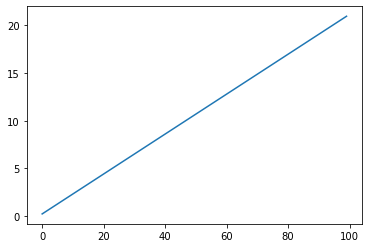

In [7]:
plt.plot(cumulative_regret)